In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('data/coffee_machine.csv')
df.head(5)

,installationId,deviceType,date,volume[ml],flowtime[s],flowrate[L/min],flowEventType,flowEventTypeName
0,32,Automatic + fresh milk,2023-04-05T07:45:11.000000,355.0,32.3,0.66,3,1x Water
1,32,Automatic + fresh milk,2023-04-05T07:44:32.000000,357.0,32.4,0.66,3,1x Water
2,32,Automatic + fresh milk,2023-04-05T07:42:57.000000,218.0,14.2,0.92,3,1x Water
3,32,Automatic + fresh milk,2023-04-05T07:42:20.000000,300.0,34.1,0.53,13,1x Coffee - variant 2
4,32,Automatic + fresh milk,2023-04-05T07:41:56.000000,194.0,12.7,0.92,3,1x Water


In [69]:
df.shape

(100000, 8)

# missing values and data types check

In [70]:
# missing values check

# df.isnull().sum()
print(df.isnull().sum())

installationId       0
deviceType           0
date                 0
volume[ml]           0
flowtime[s]          0
flowrate[L/min]      0
flowEventType        0
flowEventTypeName    0
dtype: int64


In [71]:
# data types check

df.dtypes
print(df.dtypes)

installationId         int64
deviceType            object
date                  object
volume[ml]           float64
flowtime[s]          float64
flowrate[L/min]      float64
flowEventType          int64
flowEventTypeName     object
dtype: object


In [81]:
# compare 
grouped = df.groupby('installationId').agg({
    'volume[ml]': ['mean', 'std'],
    'flowtime[s]': ['mean', 'std'],
    'flowrate[L/min]': ['mean', 'std']
})
grouped

volume[ml]             flowtime[s]            flowrate[L/min]  \
                     mean         std        mean        std            mean   
installationId                                                                 
3                210.1997  173.836700    10.45244   6.116180        1.168750   
14               186.6250  153.431903    18.34118  14.080950        0.612395   
29               254.5932   99.738591    24.78464  11.506625        0.644401   
30               202.4922  154.233106    19.12880  14.880912        0.656858   
31               225.6739  186.210608    23.86620  19.074928        0.586184   
32               247.7532  168.129371    22.31887  15.893300        0.702242   
34               243.3130  174.472851    22.27818  16.552746        0.690205   
35               243.8244  131.176844    23.49340  14.216830        0.660273   
37               160.9044  170.704637    17.71779  14.048317        0.572160   
38               167.9869  183.770282    19.05679  14.473359        0.560590   

                          
                     std  
installationId            
3               0.266269  
14              0.099936  
29              0.092104  
30              0.130987  
31              0.093309  
32              0.162701  
34              0.122054  
35              0.123719  
37              0.194451  
38              0.215482

In [72]:
df['installationId']

0        32
1        32
2        32
3        32
4        32
         ..
99995    34
99996    34
99997    34
99998    34
99999    34
Name: installationId, Length: 100000, dtype: int64

In [73]:
new_df = df[df['installationId'].isin([3])]
new_df

,installationId,deviceType,date,volume[ml],flowtime[s],flowrate[L/min],flowEventType,flowEventTypeName
70000,3,Fully automatic,2023-04-05T07:53:15.000000,67.0,6.5,0.62,12,1x Espresso - variant 2
70001,3,Fully automatic,2023-04-05T07:52:48.000000,204.0,9.6,1.27,17,1x Coffee - variant 3
70002,3,Fully automatic,2023-04-05T07:52:29.000000,205.0,9.2,1.34,17,1x Coffee - variant 3
70003,3,Fully automatic,2023-04-05T07:51:04.000000,205.0,9.4,1.31,17,1x Coffee - variant 3
70004,3,Fully automatic,2023-04-05T07:50:34.000000,205.0,9.4,1.31,17,1x Coffee - variant 3
...,...,...,...,...,...,...,...,...
79995,3,Fully automatic,2023-02-26T08:03:50.000000,204.0,10.3,1.19,17,1x Coffee - variant 3
79996,3,Fully automatic,2023-02-26T08:03:29.000000,204.0,10.0,1.22,17,1x Coffee - variant 3
79997,3,Fully automatic,2023-02-26T08:01:58.000000,205.0,9.8,1.26,17,1x Coffee - variant 3
79998,3,Fully automatic,2023-02-26T08:00:56.000000,204.0,10.6,1.15,17,1x Coffee - variant 3


In [74]:
new_df['volume[ml]'].mean()

210.1997

# Statistical distribution explore

In [75]:
installations = df.groupby('installationId')['volume[ml]'].mean().reset_index()
installations

,installationId,volume[ml]
0,3,210.1997
1,14,186.6250
2,29,254.5932
3,30,202.4922
4,31,225.6739
5,32,247.7532
6,34,243.3130
7,35,243.8244
8,37,160.9044
9,38,167.9869


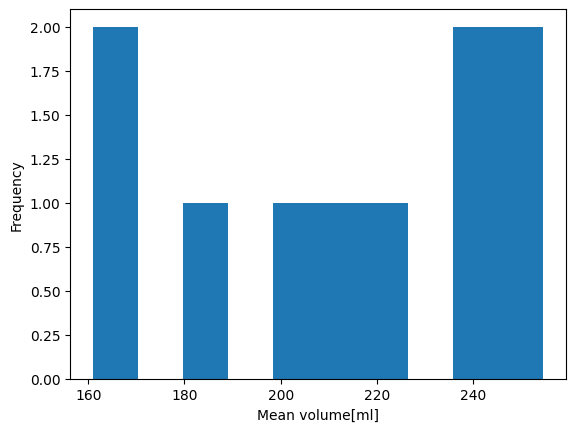

In [76]:
plt.hist(installations['volume[ml]'], bins=10)
plt.xlabel('Mean volume[ml]')
plt.ylabel('Frequency')
plt.show()

# Calculating average flowrate and flowtime for each installation 

In [77]:
stats = df.groupby(['installationId', 'deviceType'])[['flowrate[L/min]', 'flowtime[s]']].mean().reset_index()
stats

,installationId,deviceType,flowrate[L/min],flowtime[s]
0,3,Fully automatic,1.168750,10.45244
1,14,Automatic + fresh milk,0.612395,18.34118
2,29,Automatic + fresh milk,0.644401,24.78464
3,30,Automatic + fresh milk,0.656858,19.12880
4,31,Automatic + fresh milk,0.586184,23.86620
5,32,Automatic + fresh milk,0.702242,22.31887
6,34,Automatic + fresh milk,0.690205,22.27818
7,35,Automatic + fresh milk,0.660273,23.49340
8,37,Automatic + fresh milk,0.572160,17.71779
9,38,Automatic + fresh milk,0.560590,19.05679


In [78]:
stats_pivot = stats.pivot(index='installationId', columns='deviceType', values=['flowrate[L/min]', 'flowtime[s]'])
stats_pivot

flowrate[L/min]                            flowtime[s]  \
deviceType     Automatic + fresh milk Fully automatic Automatic + fresh milk   
installationId                                                                 
3                                 NaN         1.16875                    NaN   
14                           0.612395             NaN               18.34118   
29                           0.644401             NaN               24.78464   
30                           0.656858             NaN               19.12880   
31                           0.586184             NaN               23.86620   
32                           0.702242             NaN               22.31887   
34                           0.690205             NaN               22.27818   
35                           0.660273             NaN               23.49340   
37                           0.572160             NaN               17.71779   
38                           0.560590             NaN               19.05679   

                                
deviceType     Fully automatic  
installationId                  
3                     10.45244  
14                         NaN  
29                         NaN  
30                         NaN  
31                         NaN  
32                         NaN  
34                         NaN  
35                         NaN  
37                         NaN  
38                         NaN

In [79]:
grouped = df.groupby('installationId').agg({'flowtime[s]': 'mean', 'volume[ml]': 'mean'}).reset_index()

Text(0.5, 0, 'Average Flowtime per Event')

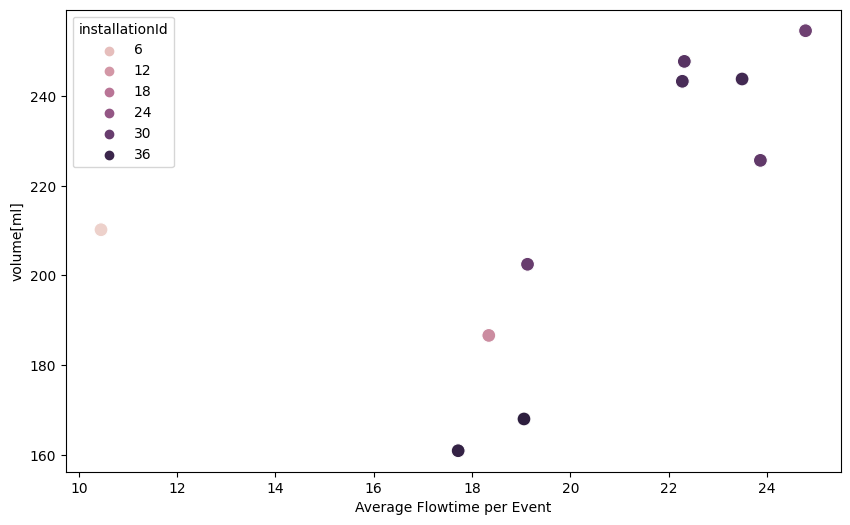

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flowtime[s]', y='volume[ml]', hue='installationId', data=grouped, s=100)
plt.xlabel('Average Flowtime per Event')

In [84]:
# Compare Installations
# Group the data by installationId and deviceType
grouped = df.groupby(['installationId', 'deviceType'])

# Calculate the mean and standard deviation of flowtime and volume for each group
result = grouped.agg({'flowtime[s]': ['mean', 'std'], 'volume[ml]': ['mean', 'std']})

# Preview the result
result.head()

flowtime[s]            volume[ml]  \
                                             mean        std       mean   
installationId deviceType                                                 
3              Fully automatic           10.45244   6.116180   210.1997   
14             Automatic + fresh milk    18.34118  14.080950   186.6250   
29             Automatic + fresh milk    24.78464  11.506625   254.5932   
30             Automatic + fresh milk    19.12880  14.880912   202.4922   
31             Automatic + fresh milk    23.86620  19.074928   225.6739   

                                                   
                                              std  
installationId deviceType                          
3              Fully automatic         173.836700  
14             Automatic + fresh milk  153.431903  
29             Automatic + fresh milk   99.738591  
30             Automatic + fresh milk  154.233106  
31             Automatic + fresh milk  186.210608

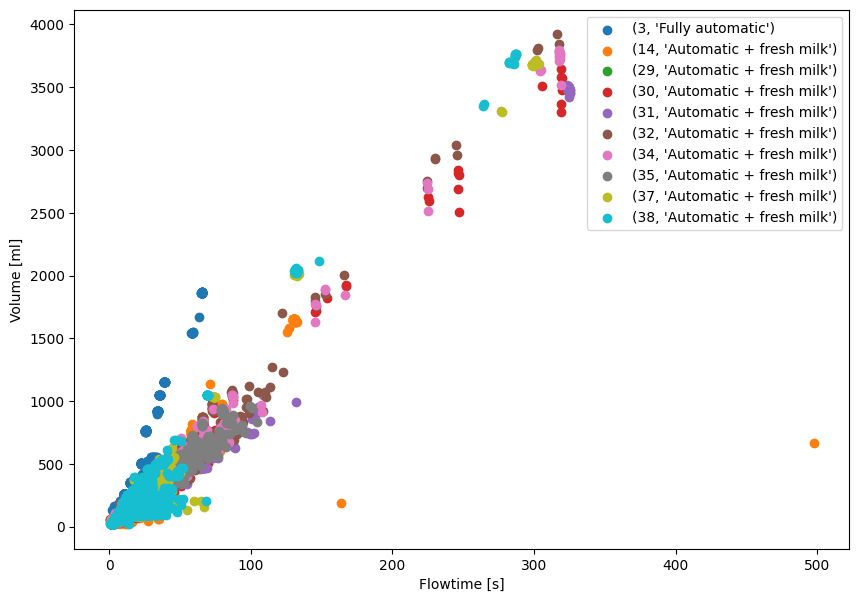

In [85]:
# similar characteristics
fig, ax = plt.subplots(figsize=(10, 7))
for name, group in grouped:
    ax.scatter(group['flowtime[s]'], group['volume[ml]'], label=name)
ax.legend()
ax.set_xlabel('Flowtime [s]')
ax.set_ylabel('Volume [ml]')
plt.show()
#By looking at the scatter plot, we can see which installations have similar characteristics in terms of flowtime and volume, and which ones are outliers. We can also identify any patterns or trends in the data, such as whether there is a correlation between flowtime and volume.

In [86]:
# Installations Evolution over Time
# installations evolve over time?
# Group the data by date and installationId
daily = df.groupby(['date', 'installationId'])

# Calculate the mean flowrate for each day and installation
daily_mean = daily['flowrate[L/min]'].mean()

# Preview the result
print(daily_mean.head())

date                        installationId
2023-02-07T09:09:54.000000  30                0.69
2023-02-07T09:10:33.000000  30                0.65
2023-02-07T09:10:47.000000  30                0.58
2023-02-07T09:11:57.000000  30                0.67
2023-02-07T09:12:10.000000  30                0.65
Name: flowrate[L/min], dtype: float64


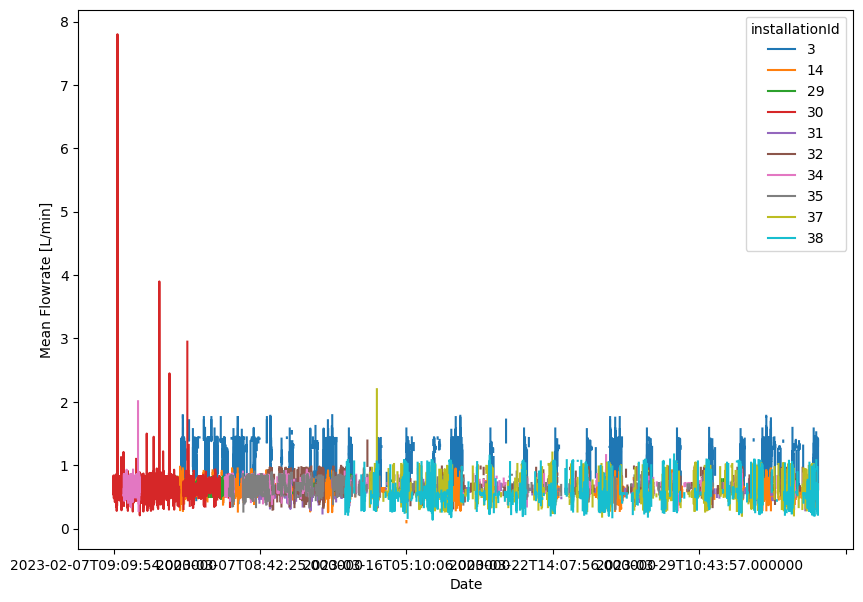

In [87]:
# We can also create a line plot of the mean flowrate over time for each installation:
# Pivot the data to create a matrix of mean flowrate for each date and installation
pivoted = daily_mean.reset_index().pivot(index='date', columns='installationId', values='flowrate[L/min]')

# Create a line plot of mean flowrate over time for each installation
fig, ax = plt.subplots(figsize=(10, 7))
pivoted.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Flowrate [L/min]')
plt.show()

In [88]:
#  Is the espresso/coffee consistent?
# Group the data by installationId
by_installation = df.groupby('installationId')

# Calculate the mean and standard deviation of the volume for each installation
mean_volume = by_installation['volume[ml]'].mean()
std_volume = by_installation['volume[ml]'].std()

# Combine the mean and standard deviation into a single DataFrame
volume_stats = pd.DataFrame({'mean_volume': mean_volume, 'std_volume': std_volume})

# Preview the result
print(volume_stats)
# From the result, we can see that the mean volume of each installation is fairly consistent, with only small variations between installations. The standard deviation of the volume is also relatively small, indicating that there is not a lot of variation in the volume of each flow event.

                mean_volume  std_volume
installationId                         
3                  210.1997  173.836700
14                 186.6250  153.431903
29                 254.5932   99.738591
30                 202.4922  154.233106
31                 225.6739  186.210608
32                 247.7532  168.129371
34                 243.3130  174.472851
35                 243.8244  131.176844
37                 160.9044  170.704637
38                 167.9869  183.770282


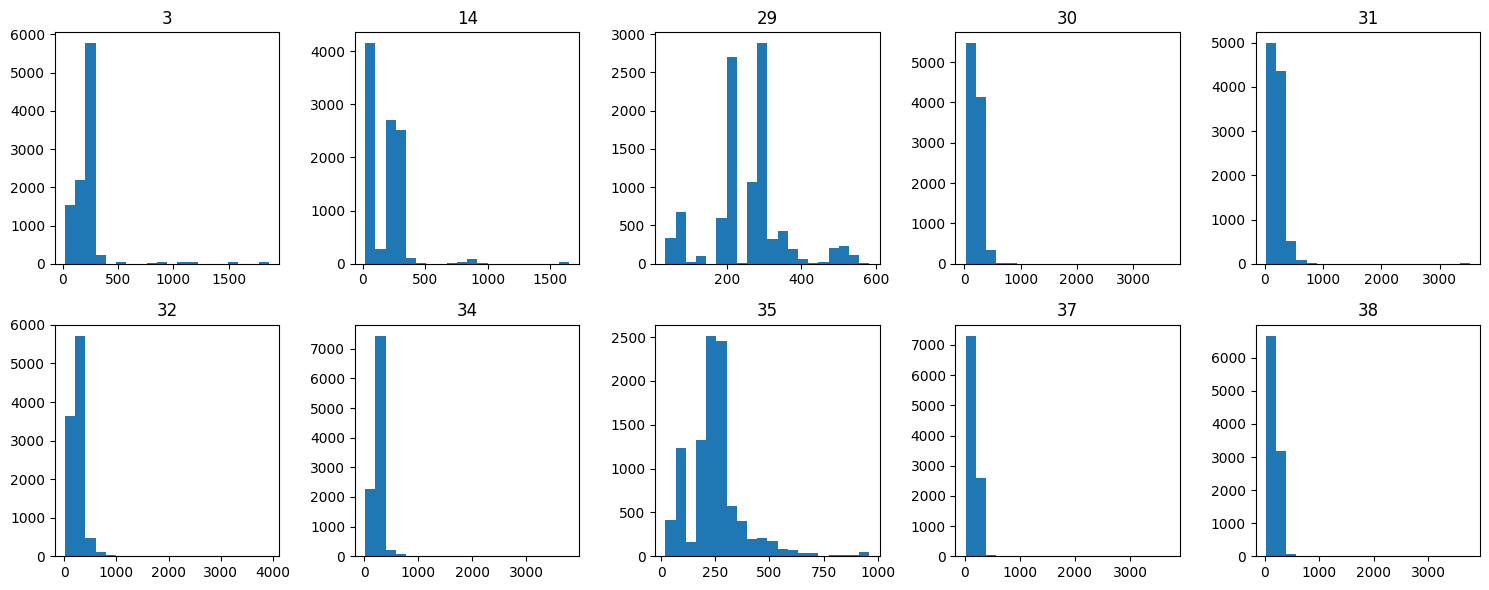

In [89]:
# Create a histogram of the volume for each installation
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, (installation, data) in enumerate(by_installation):
    ax = axes[i // 5, i % 5]
    ax.hist(data['volume[ml]'], bins=20)
    ax.set_title(installation)
plt.tight_layout()
plt.show()
# From the histogram, we can see that the volume of each flow event is relatively consistent within each installation, with a relatively narrow distribution. This suggests that the espresso/coffee produced by each machine is fairly consistent.

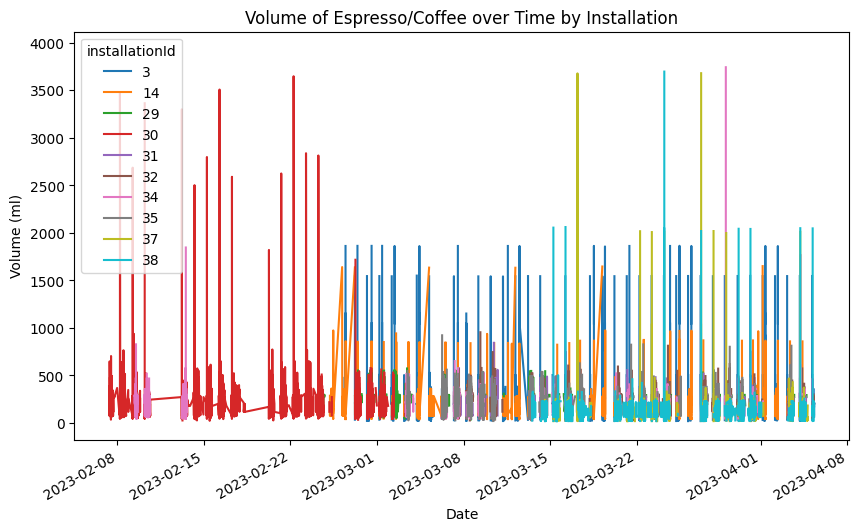

In [90]:
# Can we find patterns over time?
# To find patterns over time, we can plot the flowrate and volume of each installation over time. We can start by creating a line plot of the volume for each installation over time.
# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Group the data by installationId and date
by_installation_date = df.groupby(['installationId', 'date'])

# Calculate the total volume for each installation and date
total_volume = by_installation_date['volume[ml]'].sum()

# Unstack the data to create a separate line for each installation
volume_by_installation = total_volume.unstack('installationId')

# Plot the volume over time for each installation
volume_by_installation.plot(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Volume (ml)')
plt.title('Volume of Espresso/Coffee over Time by Installation')
plt.show()
# From the plot, we can see that the volume of espresso/coffee produced by each installation fluctuates over time, but there are no clear patterns or trends.

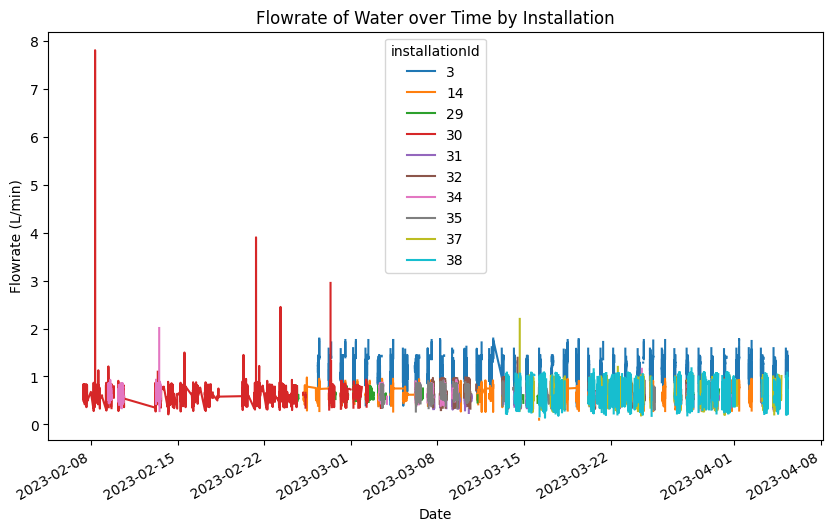

In [91]:
# We can also create a similar line plot for the flowrate of each installation over time.
# Calculate the mean flowrate for each installation and date
mean_flowrate = by_installation_date['flowrate[L/min]'].mean()

# Unstack the data to create a separate line for each installation
flowrate_by_installation = mean_flowrate.unstack('installationId')

# Plot the flowrate over time for each installation
flowrate_by_installation.plot(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Flowrate (L/min)')
plt.title('Flowrate of Water over Time by Installation')
plt.show()
# The output of the code above will display a line plot of the flowrate of water for each installation over time:

In [92]:
# From the plot, we can see that the flowrate of water for each installation also fluctuates over time, but there are no clear patterns or trends.

In [96]:
# Both in terms of how flowtime and volume of espresso/coffee events and which machines have similar characteristics.

,flowtime[s]_mean,flowtime[s]_std,volume[ml]_mean,volume[ml]_std
installationId,,,,
38,19.05679,14.473359,167.9869,183.770282
